# ---------- DSP2017 Project ----------
## Movies preferences from music preferences
# ----------------------------------------------

### Import libraries:

In [91]:
import pandas as pnd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## PREPARING MODEL -----------------------------------------------------------------------------------------:

### Loading data

In [92]:
dFrame = pnd.read_csv("./data/music_and_movies_responses.csv")

In [93]:
dFrame.shape # show number of (rows, columns)


(1010, 31)

### Check if exists any null value in data frame

In [94]:
isAnyNull = dFrame.isnull().values.any()
print(isAnyNull)

True


In [95]:
pnd.isnull(dFrame).sum() #Check which columns contains null value and how many.

Music                       3
Slow songs or fast songs    2
Dance                       4
Folk                        5
Country                     5
Classical music             7
Musical                     2
Pop                         3
Rock                        6
Metal or Hardrock           3
Punk                        8
Hiphop, Rap                 4
Reggae, Ska                 7
Swing, Jazz                 6
Rock n roll                 7
Alternative                 7
Latino                      8
Techno, Trance              7
Opera                       1
Movies                      6
Horror                      2
Thriller                    1
Comedy                      3
Romantic                    3
Sci-fi                      2
War                         2
Fantasy/Fairy tales         3
Animated                    3
Documentary                 8
Western                     4
Action                      2
dtype: int64

#### Delete rows with null value:

In [96]:
dFrame_without_null = dFrame.dropna()

dFrame_without_null.shape

(906, 31)

### Check if exists values not in scale ( < 1 or > 5)

In [97]:
print("# rows in dataframe: {0}".format(len(dFrame)))
print("# rows are < 1 -Do you like music at all?-: {0}".format(len(dFrame.loc[dFrame['Music'] < 1])))
print("# rows are < 1 -Slow or fast songs?-: {0}".format(len(dFrame.loc[dFrame["Slow songs or fast songs"] < 1])))
print("# rows are < 1 -Do you like dance music?-: {0}".format(len(dFrame.loc[dFrame["Dance"] < 1])))
print("# rows are < 1 -Do you like folk music?-: {0}".format(len(dFrame.loc[dFrame["Folk"] < 1])))
print("# rows are < 1 -Do you like music country?-: {0}".format(len(dFrame.loc[dFrame["Country"] < 1])))
print("# rows are < 1 -Do you like music classic?-: {0}".format(len(dFrame.loc[dFrame["Classical music"] < 1])))
print("# rows are < 1 -Do you like music musical?-: {0}".format(len(dFrame.loc[dFrame["Musical"] < 1])))
print("# rows are < 1 -Do you like music pop?-: {0}".format(len(dFrame.loc[dFrame["Pop"] < 1])))
print("# rows are < 1 -Do you like music rock?-: {0}".format(len(dFrame.loc[dFrame["Rock"] < 1])))
print("# rows are < 1 -Do you like music metal?-: {0}".format(len(dFrame.loc[dFrame["Metal or Hardrock"]  < 1])))
print("# rows are < 1 -Do you like music punk?-: {0}".format(len(dFrame.loc[dFrame["Punk"] < 1])))
print("# rows are < 1 -Do you like music rap?-: {0}".format(len(dFrame.loc[dFrame["Hiphop, Rap"] < 1])))
print("# rows are < 1 -Do you like music reggae?-: {0}".format(len(dFrame.loc[dFrame["Reggae, Ska"] < 1])))
print("# rows are < 1 -Do you like music jazz?-: {0}".format(len(dFrame.loc[dFrame["Swing, Jazz"] < 1])))
print("# rows are < 1 -Do you like music rock n'roll?-: {0}".format(len(dFrame.loc[dFrame["Rock n roll"] < 1])))
print("# rows are < 1 -Do you like music alternative?-: {0}".format(len(dFrame.loc[dFrame["Alternative"] < 1])))
print("# rows are < 1 -Do you like music laino?-: {0}".format(len(dFrame.loc[dFrame["Latino"] < 1])))
print("# rows are < 1 -Do you like music techno?-: {0}".format(len(dFrame.loc[dFrame["Techno, Trance"] < 1])))
print("# rows are < 1 -Do you like music opera?-: {0}".format(len(dFrame.loc[dFrame["Opera"] < 1])))
print("# rows are < 1 -Do you like movies at all?-: {0}".format(len(dFrame.loc[dFrame['Movies'] < 1])))
print("# rows are < 1 -Do you like horror?-: {0}".format(len(dFrame.loc[dFrame['Horror'] < 1])))
print("# rows are < 1 -Do you like thriller?-: {0}".format(len(dFrame.loc[dFrame['Thriller'] < 1])))
print("# rows are < 1 -Do you like comedy?-: {0}".format(len(dFrame.loc[dFrame['Comedy'] < 1])))
print("# rows are < 1 -Do you like romantic?-: {0}".format(len(dFrame.loc[dFrame['Romantic'] < 1])))
print("# rows are < 1 -Do you like sci-fi?-: {0}".format(len(dFrame.loc[dFrame['Sci-fi'] < 1])))
print("# rows are < 1 -Do you like war?-: {0}".format(len(dFrame.loc[dFrame['War'] < 1])))
print("# rows are < 1 -Do you like fantasy?-: {0}".format(len(dFrame.loc[dFrame['Fantasy/Fairy tales'] < 1])))
print("# rows are < 1 -Do you like animated?-: {0}".format(len(dFrame.loc[dFrame['Animated'] < 1])))
print("# rows are < 1 -Do you like documentary?-: {0}".format(len(dFrame.loc[dFrame['Documentary'] < 1])))
print("# rows are < 1 -Do you like western?-: {0}".format(len(dFrame.loc[dFrame['Western'] < 1])))
print("# rows are < 1 -Do you like action?-: {0}".format(len(dFrame.loc[dFrame['Action'] < 1])))

# rows in dataframe: 1010
# rows are < 1 -Do you like music at all?-: 0
# rows are < 1 -Slow or fast songs?-: 0
# rows are < 1 -Do you like dance music?-: 0
# rows are < 1 -Do you like folk music?-: 0
# rows are < 1 -Do you like music country?-: 0
# rows are < 1 -Do you like music classic?-: 0
# rows are < 1 -Do you like music musical?-: 0
# rows are < 1 -Do you like music pop?-: 0
# rows are < 1 -Do you like music rock?-: 0
# rows are < 1 -Do you like music metal?-: 0
# rows are < 1 -Do you like music punk?-: 0
# rows are < 1 -Do you like music rap?-: 0
# rows are < 1 -Do you like music reggae?-: 0
# rows are < 1 -Do you like music jazz?-: 0
# rows are < 1 -Do you like music rock n'roll?-: 0
# rows are < 1 -Do you like music alternative?-: 0
# rows are < 1 -Do you like music laino?-: 0
# rows are < 1 -Do you like music techno?-: 0
# rows are < 1 -Do you like music opera?-: 0
# rows are < 1 -Do you like movies at all?-: 0
# rows are < 1 -Do you like horror?-: 0
# rows are < 1 -Do you l

In [98]:
print("# rows in dataframe: {0}".format(len(dFrame)))
print("# rows are > 5 -Do you like music at all?-: {0}".format(len(dFrame.loc[dFrame['Music'] > 5])))
print("# rows are > 5 -Slow or fast songs?-: {0}".format(len(dFrame.loc[dFrame["Slow songs or fast songs"] > 5])))
print("# rows are > 5 -Do you like dance music?-: {0}".format(len(dFrame.loc[dFrame["Dance"] > 5])))
print("# rows are > 5 -Do you like folk music?-: {0}".format(len(dFrame.loc[dFrame["Folk"] > 5])))
print("# rows are > 5 -Do you like music country?-: {0}".format(len(dFrame.loc[dFrame["Country"] > 5])))
print("# rows are > 5 -Do you like music classic?-: {0}".format(len(dFrame.loc[dFrame["Classical music"] > 5])))
print("# rows are > 5 -Do you like music musical?-: {0}".format(len(dFrame.loc[dFrame["Musical"] > 5])))
print("# rows are > 5 -Do you like music pop?-: {0}".format(len(dFrame.loc[dFrame["Pop"] > 5])))
print("# rows are > 5 -Do you like music rock?-: {0}".format(len(dFrame.loc[dFrame["Rock"] > 5])))
print("# rows are > 5 -Do you like music metal?-: {0}".format(len(dFrame.loc[dFrame["Metal or Hardrock"] > 5])))
print("# rows are > 5 -Do you like music punk?-: {0}".format(len(dFrame.loc[dFrame["Punk"] > 5])))
print("# rows are > 5 -Do you like music rap?-: {0}".format(len(dFrame.loc[dFrame["Hiphop, Rap"] > 5])))
print("# rows are > 5 -Do you like music reggae?-: {0}".format(len(dFrame.loc[dFrame["Reggae, Ska"] > 5])))
print("# rows are > 5 -Do you like music jazz?-: {0}".format(len(dFrame.loc[dFrame["Swing, Jazz"] > 5])))
print("# rows are > 5 -Do you like music rock n'roll?-: {0}".format(len(dFrame.loc[dFrame["Rock n roll"] > 5])))
print("# rows are > 5 -Do you like music alternative?-: {0}".format(len(dFrame.loc[dFrame["Alternative"] > 5])))
print("# rows are > 5 -Do you like music laino?-: {0}".format(len(dFrame.loc[dFrame["Latino"] > 5])))
print("# rows are > 5 -Do you like music techno?-: {0}".format(len(dFrame.loc[dFrame["Techno, Trance"] > 5])))
print("# rows are > 5 -Do you like music opera?-: {0}".format(len(dFrame.loc[dFrame["Opera"] > 5])))
print("# rows are > 5 -Do you like movies at all?-: {0}".format(len(dFrame.loc[dFrame['Movies'] > 5])))
print("# rows are > 5 -Do you like horror?-: {0}".format(len(dFrame.loc[dFrame['Horror'] > 5])))
print("# rows are > 5 -Do you like thriller?-: {0}".format(len(dFrame.loc[dFrame['Thriller'] > 5])))
print("# rows are > 5 -Do you like comedy?-: {0}".format(len(dFrame.loc[dFrame['Comedy'] > 5])))
print("# rows are > 5 -Do you like romantic?-: {0}".format(len(dFrame.loc[dFrame['Romantic'] > 5])))
print("# rows are > 5 -Do you like sci-fi?-: {0}".format(len(dFrame.loc[dFrame['Sci-fi'] > 5])))
print("# rows are > 5 -Do you like war?-: {0}".format(len(dFrame.loc[dFrame['War'] > 5])))
print("# rows are > 5 -Do you like fantasy?-: {0}".format(len(dFrame.loc[dFrame['Fantasy/Fairy tales'] > 5])))
print("# rows are > 5 -Do you like animated?-: {0}".format(len(dFrame.loc[dFrame['Animated'] > 5])))
print("# rows are > 5 -Do you like documentary?-: {0}".format(len(dFrame.loc[dFrame['Documentary'] > 5])))
print("# rows are > 5 -Do you like western?-: {0}".format(len(dFrame.loc[dFrame['Western'] > 5])))
print("# rows are > 5 -Do you like action?-: {0}".format(len(dFrame.loc[dFrame['Action'] > 5])))

# rows in dataframe: 1010
# rows are > 5 -Do you like music at all?-: 0
# rows are > 5 -Slow or fast songs?-: 0
# rows are > 5 -Do you like dance music?-: 0
# rows are > 5 -Do you like folk music?-: 0
# rows are > 5 -Do you like music country?-: 0
# rows are > 5 -Do you like music classic?-: 0
# rows are > 5 -Do you like music musical?-: 0
# rows are > 5 -Do you like music pop?-: 0
# rows are > 5 -Do you like music rock?-: 0
# rows are > 5 -Do you like music metal?-: 0
# rows are > 5 -Do you like music punk?-: 0
# rows are > 5 -Do you like music rap?-: 0
# rows are > 5 -Do you like music reggae?-: 0
# rows are > 5 -Do you like music jazz?-: 0
# rows are > 5 -Do you like music rock n'roll?-: 0
# rows are > 5 -Do you like music alternative?-: 0
# rows are > 5 -Do you like music laino?-: 0
# rows are > 5 -Do you like music techno?-: 0
# rows are > 5 -Do you like music opera?-: 0
# rows are > 5 -Do you like movies at all?-: 0
# rows are > 5 -Do you like horror?-: 0
# rows are > 5 -Do you l

### Check if all columns in data frame are numeric:

In [99]:
dFrame.dtypes

Music                       float64
Slow songs or fast songs    float64
Dance                       float64
Folk                        float64
Country                     float64
Classical music             float64
Musical                     float64
Pop                         float64
Rock                        float64
Metal or Hardrock           float64
Punk                        float64
Hiphop, Rap                 float64
Reggae, Ska                 float64
Swing, Jazz                 float64
Rock n roll                 float64
Alternative                 float64
Latino                      float64
Techno, Trance              float64
Opera                       float64
Movies                      float64
Horror                      float64
Thriller                    float64
Comedy                      float64
Romantic                    float64
Sci-fi                      float64
War                         float64
Fantasy/Fairy tales         float64
Animated                    

### Check for correlated values:

In [109]:
def visualise_correlations(data_frame, size = 10):
    '''
    Display graphical correlations matrix for each pair of columns in data frame.
    Key:
        White - heavy correlation
        Black - without correlation
    '''
    correlations = data_frame.corr('spearman', 9)
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(correlations, cmap=plt.cm.gray)
    plt.xticks(range(len(correlations.columns)), correlations.columns)
    plt.yticks(range(len(correlations.columns)), correlations.columns)

In [110]:
dFrame.corr()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action
Music,1.000000,0.100207,0.081572,0.031212,-0.007589,0.059276,0.064674,0.079583,0.165995,0.025163,...,0.021672,0.080313,0.063527,0.020667,-0.035345,0.122020,0.086014,-0.038650,-0.063580,-0.002665
Slow songs or fast songs,0.100207,1.000000,0.196041,-0.060910,-0.070274,-0.156435,-0.069897,0.064220,-0.006619,0.053267,...,0.079915,0.073909,-0.127408,0.039521,0.014452,-0.071954,-0.013764,-0.023560,0.029033,0.117482
Dance,0.081572,0.196041,1.000000,0.065654,0.058415,-0.089148,0.074097,0.431962,-0.134825,-0.234597,...,0.080380,0.164104,0.146237,0.022262,-0.045848,0.078855,0.100750,-0.027239,-0.010861,0.103809
Folk,0.031212,-0.060910,0.065654,1.000000,0.386646,0.371015,0.263020,0.023270,0.059448,0.069513,...,-0.057083,-0.059634,0.110371,0.073316,0.035149,0.201166,0.102091,0.208953,0.171156,-0.044409
Country,-0.007589,-0.070274,0.058415,0.386646,1.000000,0.256018,0.205943,0.008051,0.130418,0.112666,...,0.024421,-0.017817,0.032957,0.151393,0.131236,0.090196,0.050337,0.152591,0.333540,0.031827
Classical music,0.059276,-0.156435,-0.089148,0.371015,0.256018,1.000000,0.350515,-0.044495,0.219859,0.179177,...,0.018995,-0.118466,0.019581,0.142600,0.121445,0.148933,0.125253,0.305522,0.153651,-0.009038
Musical,0.064674,-0.069897,0.074097,0.263020,0.205943,0.350515,1.000000,0.229291,0.094939,-0.028840,...,-0.067701,0.038496,0.280211,0.009066,-0.085223,0.268861,0.196827,0.004282,-0.003128,-0.103644
Pop,0.079583,0.064220,0.431962,0.023270,0.008051,-0.044495,0.229291,1.000000,-0.016490,-0.283479,...,0.034750,0.229387,0.267490,-0.009072,-0.153257,0.174736,0.142123,-0.128913,-0.129713,0.068769
Rock,0.165995,-0.006619,-0.134825,0.059448,0.130418,0.219859,0.094939,-0.016490,1.000000,0.527118,...,0.116824,-0.037418,-0.061783,0.086110,0.091544,0.077935,0.177545,0.105597,0.091207,0.019263
Metal or Hardrock,0.025163,0.053267,-0.234597,0.069513,0.112666,0.179177,-0.028840,-0.283479,0.527118,1.000000,...,0.126543,-0.120897,-0.208991,0.158501,0.151552,-0.043799,0.036761,0.085767,0.227755,0.081594


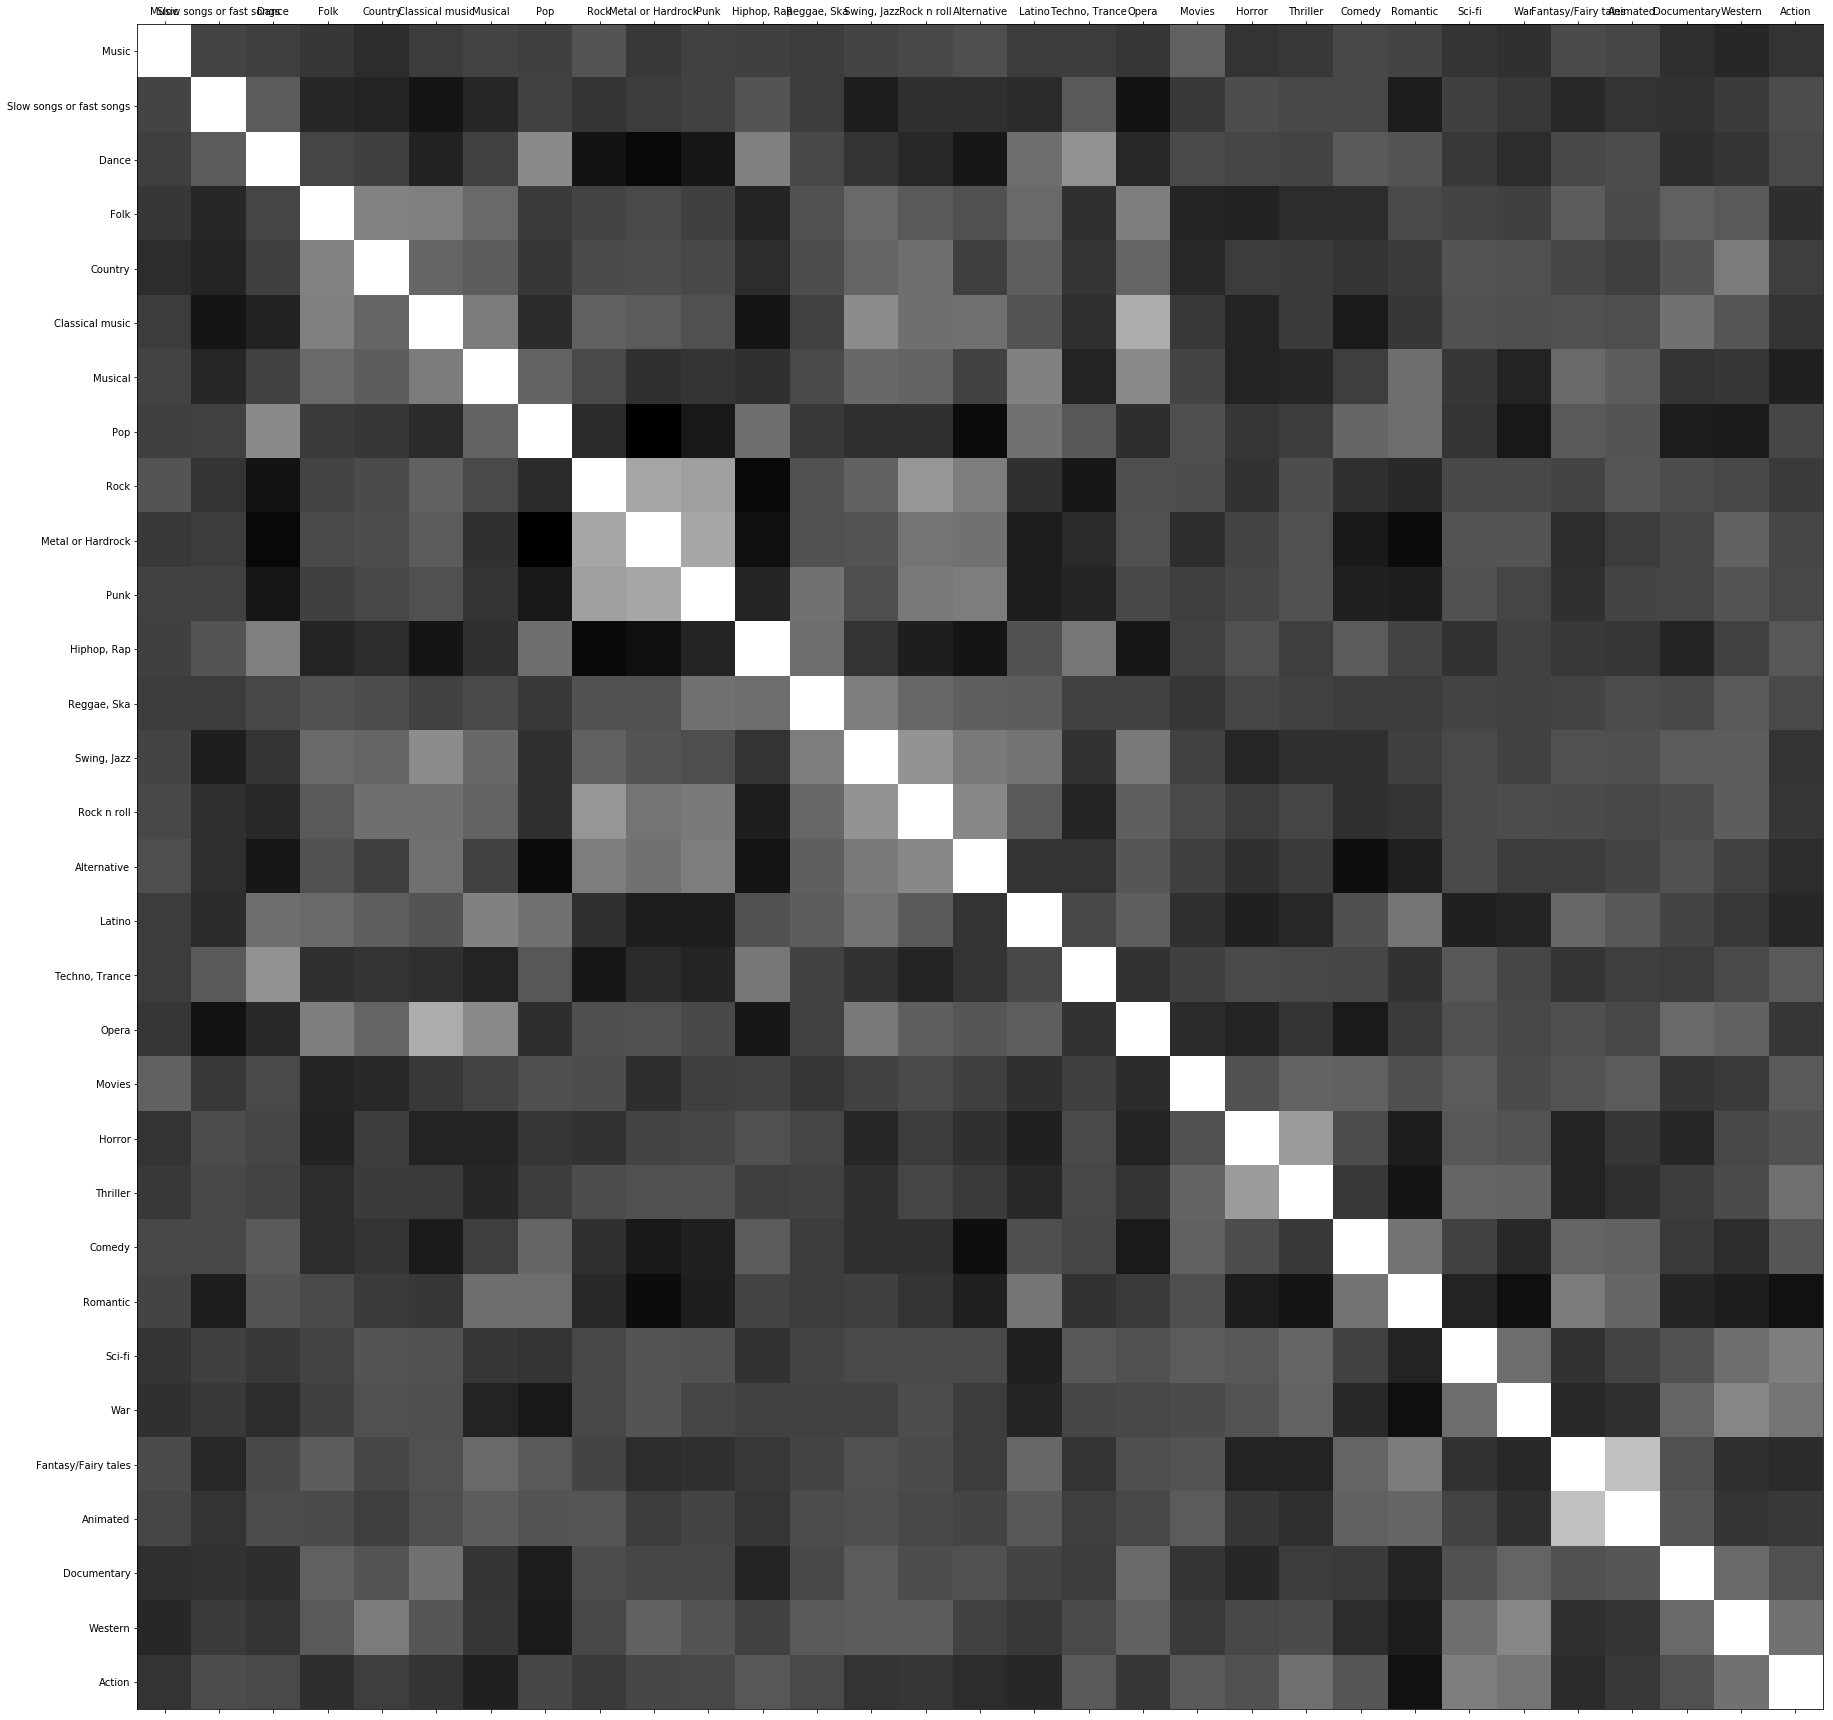

In [113]:
visualise_correlations(dFrame, 31)